In [21]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from hmmlearn.hmm import GaussianHMM

print("Modules Loaded")

Modules Loaded


In [23]:
ticker_symbol = 'AAPL'  # Replace 'AAPL' with the desired stock ticker
start_date = '2018-01-01'
end_date = '2022-01-01'

# Fetch historical stock data from Yahoo Finance
stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Display the first few rows of the DataFrame
print(stock_data.head())

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2018-01-02  42.540001  43.075001  42.314999  43.064999  40.831593  102223600
2018-01-03  43.132500  43.637501  42.990002  43.057499  40.824467  118071600
2018-01-04  43.134998  43.367500  43.020000  43.257500  41.014107   89738400
2018-01-05  43.360001  43.842499  43.262501  43.750000  41.481071   94640000
2018-01-08  43.587502  43.902500  43.482498  43.587502  41.326996   82271200


In [28]:
#Extract data

dates = np.array(stock_data.index)
closing_values = np.array(stock_data['Close'])
volume_of_shares = np.array(stock_data['Volume'])

In [29]:
#Take diff of closing values and compute rate of change: 

diff_percentage = 100.0*np.diff(closing_values)/closing_values[:-1]


In [34]:
#stack the diff and volume column-wise for training

volume_of_shares = volume_of_shares[:-1]

X = np.column_stack([diff_percentage, volume_of_shares])

In [35]:
print("\nTraining HMM...")
model = GaussianHMM(n_components=5, covariance_type="diag", n_iter=1000)
model.fit(X)


Training HMM...


GaussianHMM(n_components=5, n_iter=1000)

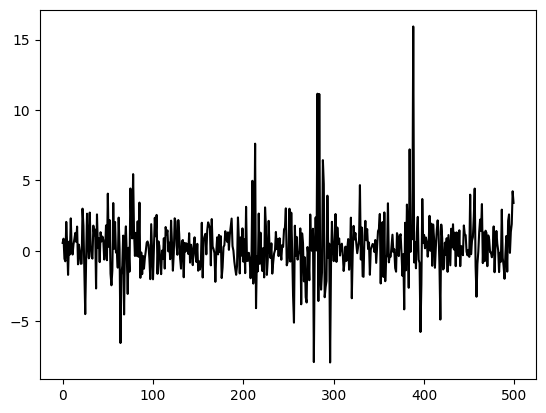

In [36]:
#Generate Data using Model

num_samples=500
samples,_ = model.sample(num_samples)
plt.plot(np.arange(num_samples), samples[:,0],c='black')
plt.show() 